# Import Necessary Libraries

In [717]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler


# Load the dataset

In [718]:
prabinAnuj = pd.read_csv("student_data.csv")
prabinAnuj.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [719]:
# data shape
prabinAnuj.shape

(395, 33)

In [720]:
# data types
prabinAnuj.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [721]:
# data description
# Summary of the dataset
prabinAnuj.describe().loc[["mean", "50%", "min", "max", "std"]]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443


In [722]:
# data information
prabinAnuj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Checking Missing Values

In [723]:
# Checking missing values
print("\nMissing Values:")
print(prabinAnuj.isnull().sum())


Missing Values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


# Checking and Handling Zero Values in all (both numeric and non-numeric) columns

In [724]:
# Display zero values before cleaning for all columns
print("\nZero values in all columns before cleaning:")
zero_values_before_all = (prabinAnuj == 0).sum()
print(zero_values_before_all)


Zero values in all columns before cleaning:
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            3
Fedu            2
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures      312
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences      115
G1              0
G2             13
G3             38
dtype: int64


In [725]:
#Numeric columns with zeros
numeric_columns_with_zeros = ['Medu', 'Fedu', 'failures', 'absences', 'G2', 'G3']

# Replace zero values with mean in numeric columns
for column in numeric_columns_with_zeros:
    if (prabinAnuj[column] == 0).any():
        mean_value = prabinAnuj[column].mean()
        prabinAnuj[column] = prabinAnuj[column].replace(0, mean_value)

# Display zero values after cleaning 
print("\nZero values in all columns after cleaning:")
zero_values_after_all = (prabinAnuj == 0).sum()
print(zero_values_after_all)


Zero values in all columns after cleaning:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


# Checking Number of Duplicate Values

In [726]:
# Check for duplicate rows
duplicate_rows = prabinAnuj.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


# Handling Outliers


In [727]:
# List of numerical columns
numerical_columns = ["age", "Medu", "Fedu", "traveltime", "studytime", "failures", 
                     "famrel", "freetime", "goout", "Dalc", "Walc", "health", 
                     "absences", "G1", "G2", "G3"]

# Filter the DataFrame to include only numerical columns
numerical_df = prabinAnuj[numerical_columns]

# Function to detect outliers using the IQR method
def detect_outliers(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_condition = ((df[column] < lower_bound) | (df[column] > upper_bound))
        outliers[column] = df[column][outlier_condition]
    return outliers

# Detect and print outliers before removal
print("\nOutliers before removal:")
outliers_before = detect_outliers(numerical_df)
for column, outliers in outliers_before.items():
    print(f"{column}: {outliers.index.tolist()}")


Outliers before removal:
age: [247]
Medu: []
Fedu: []
traveltime: [61, 108, 134, 149, 164, 228, 327, 375]
studytime: [47, 66, 67, 69, 70, 71, 76, 77, 94, 95, 105, 106, 108, 121, 140, 204, 210, 256, 259, 271, 282, 293, 298, 303, 330, 334, 338]
failures: [2, 18, 25, 40, 44, 49, 52, 72, 78, 85, 88, 95, 111, 112, 118, 127, 128, 130, 137, 138, 141, 144, 146, 149, 150, 151, 152, 153, 157, 159, 160, 161, 162, 164, 165, 170, 173, 198, 205, 206, 213, 216, 217, 221, 225, 239, 247, 248, 250, 252, 255, 270, 278, 281, 292, 304, 305, 307, 308, 309, 310, 312, 313, 314, 315, 336, 340, 341, 343, 349, 350, 352, 353, 361, 367, 370, 376, 383, 384, 387, 389, 390, 392]
famrel: [25, 27, 37, 46, 60, 66, 79, 108, 140, 141, 150, 156, 184, 206, 207, 222, 238, 240, 278, 296, 299, 349, 357, 363, 389, 391]
freetime: [7, 19, 68, 89, 95, 106, 111, 112, 168, 189, 238, 260, 276, 293, 301, 314, 315, 378, 389]
goout: []
Dalc: [29, 54, 61, 66, 100, 159, 175, 192, 211, 223, 228, 236, 247, 327, 349, 369, 384, 390]
Walc: []

In [728]:
# Function to remove outliers using the IQR method
def remove_outliers(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers
numerical_df_cleaned = remove_outliers(numerical_df)

# Detect and print outliers after removal
print("\nOutliers after removal:")
outliers_after = detect_outliers(numerical_df_cleaned)
for column, outliers in outliers_after.items():
    print(f"{column}: {outliers.index.tolist()}")


Outliers after removal:
age: []
Medu: []
Fedu: []
traveltime: []
studytime: []
failures: []
famrel: []
freetime: []
goout: []
Dalc: [23, 30, 41, 48, 50, 53, 63, 64, 73, 75, 84, 92, 125, 129, 136, 143, 148, 166, 182, 193, 197, 233, 241, 249, 254, 266, 267, 273, 275, 318, 319, 322, 323, 324, 325, 326, 337, 339, 345, 347, 351, 365, 366, 371, 377, 386, 393, 394]
Walc: []
health: []
absences: []
G1: []
G2: []
G3: []


# After removing outliers, it was observed that again outliers persisted in the 'Dalc' variable; therefore, it was dropped from the dataset.

In [729]:
prabinAnuj = prabinAnuj.drop(columns=['Dalc'])
prabinAnuj.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,...,no,4,3,4,1,3,6.0,5,6.0,6.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,...,no,5,3,3,1,3,4.0,5,5.0,6.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,no,4,3,2,3,3,10.0,7,8.0,10.0


# Encoding 

In [730]:
df = prabinAnuj

In [731]:
#list of columns that are categorical
categorical_col = df.select_dtypes(include=['object']).columns.tolist()

#list of columns that are numerical
numerical_col = df.select_dtypes(include=['number']).columns.tolist()

print(categorical_col)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [732]:
# one hot encoding
new_df = pd.get_dummies(df, columns=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet',
 'romantic'])

new_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Walc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4.0,4.0,2,2,0.334177,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1.0,1.0,1,2,0.334177,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1.0,1.0,1,2,3.000000,4,3,2,3,...,True,False,False,True,False,True,False,True,True,False
3,15,4.0,2.0,1,3,0.334177,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3.0,3.0,1,2,0.334177,4,3,2,2,...,True,False,False,True,False,True,True,False,True,False


In [733]:
# Correlation matrix 

In [734]:
# Correlation matrix
corr_matrix = new_df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
                        age      Medu      Fedu  traveltime  studytime  \
age                1.000000 -0.157980 -0.176904    0.070641  -0.004140   
Medu              -0.157980  1.000000  0.629415   -0.179175   0.065747   
Fedu              -0.176904  0.629415  1.000000   -0.150969   0.004405   
traveltime         0.070641 -0.179175 -0.150969    1.000000  -0.100909   
studytime         -0.004140  0.065747  0.004405   -0.100909   1.000000   
failures           0.225764 -0.214344 -0.256129    0.094066  -0.171748   
famrel             0.053940 -0.017370 -0.007299   -0.016808   0.039731   
freetime           0.016434  0.033588 -0.009866   -0.017025  -0.143198   
goout              0.126964  0.052048  0.037185    0.028540  -0.063904   
Walc               0.117276 -0.042591 -0.024764    0.134116  -0.253785   
health            -0.062187 -0.041773  0.001613    0.007501  -0.075616   
absences           0.179030  0.098576  0.042485   -0.010158  -0.069925   
G1               

# Heatmap of Correlation Matrix
# From seeing the value of all variables with G3 in the correlation matrix, we conclude that the variables G1, G2, Medu, Fedu, Studytime, Failures, Absences, Age, and Traveltime are the best to select for exploratory data analysis visualization. G1 and G2 have very strong positive correlations with G3, indicating that term grades are strong predictors of final grades. Medu and Fedu also show positive correlations, suggesting that parental education levels influence student performance. Studytime's positive correlation highlights the importance of study habits, while Failures' negative correlation reveals the impact of past academic difficulties on final grades. Similarly, Absences show a negative correlation, emphasizing the importance of attendance. Age has a slightly negative correlation, indicating that older students might perform slightly worse, and Traveltime, with its weak negative correlation, suggests that commute time might affect academic performance. These variables collectively provide significant insights into the factors influencing student success and are therefore critical for a comprehensive analysis.

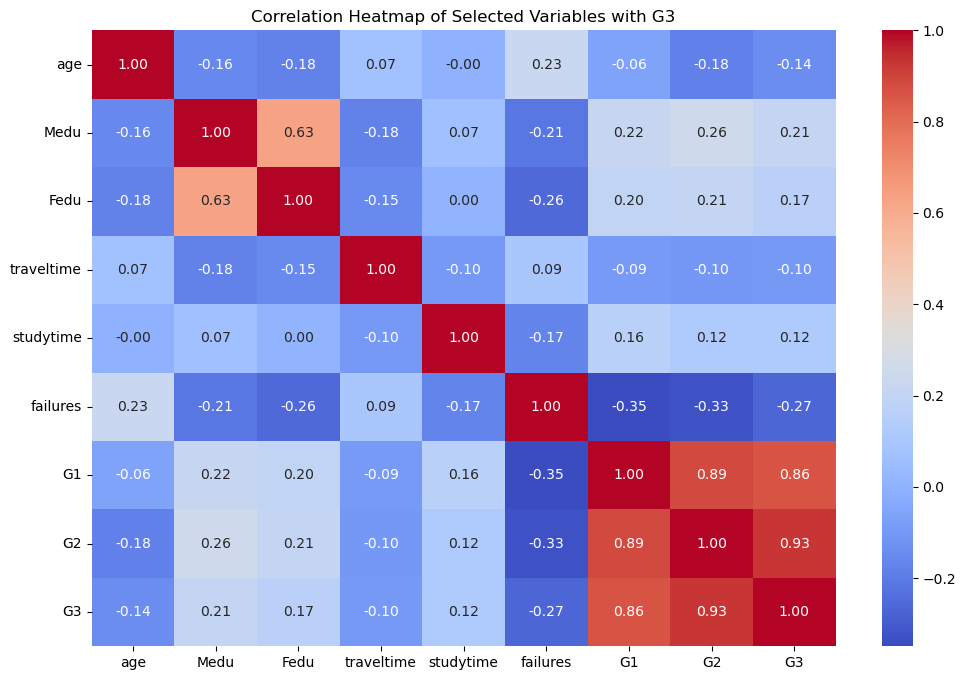

In [735]:
# From seeing the value of all variables with G3 in the correlation matrix, we conclude that the variables G1, G2, Medu, Fedu, Studytime, Failures, Absences, Age, and Traveltime are the best to select for exploratory data analysis visualization. G1 and G2 have very strong positive correlations with G3, indicating that term grades are strong predictors of final grades. Medu and Fedu also show positive correlations, suggesting that parental education levels influence student performance. Studytime's positive correlation highlights the importance of study habits, while Failures' negative correlation reveals the impact of past academic difficulties on final grades. Similarly, Absences show a negative correlation, emphasizing the importance of attendance. Age has a slightly negative correlation, indicating that older students might perform slightly worse, and Traveltime, with its weak negative correlation, suggests that commute time might affect academic performance. These variables collectively provide significant insights into the factors influencing student success and are therefore critical for a comprehensive analysis.

# List of selected variables including G3
relevant_variables = ['age', 'Medu', 'Fedu', 'traveltime','studytime', 'failures', 'G1', 'G2', 'G3']

# Creating a DataFrame with only relevant variables
relevant_df = prabinAnuj[relevant_variables]

# Calculating the correlation matrix
correlation_matrix = relevant_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Variables with G3')
plt.show()

# Plotting in the pair plot

<Figure size 1500x1000 with 0 Axes>

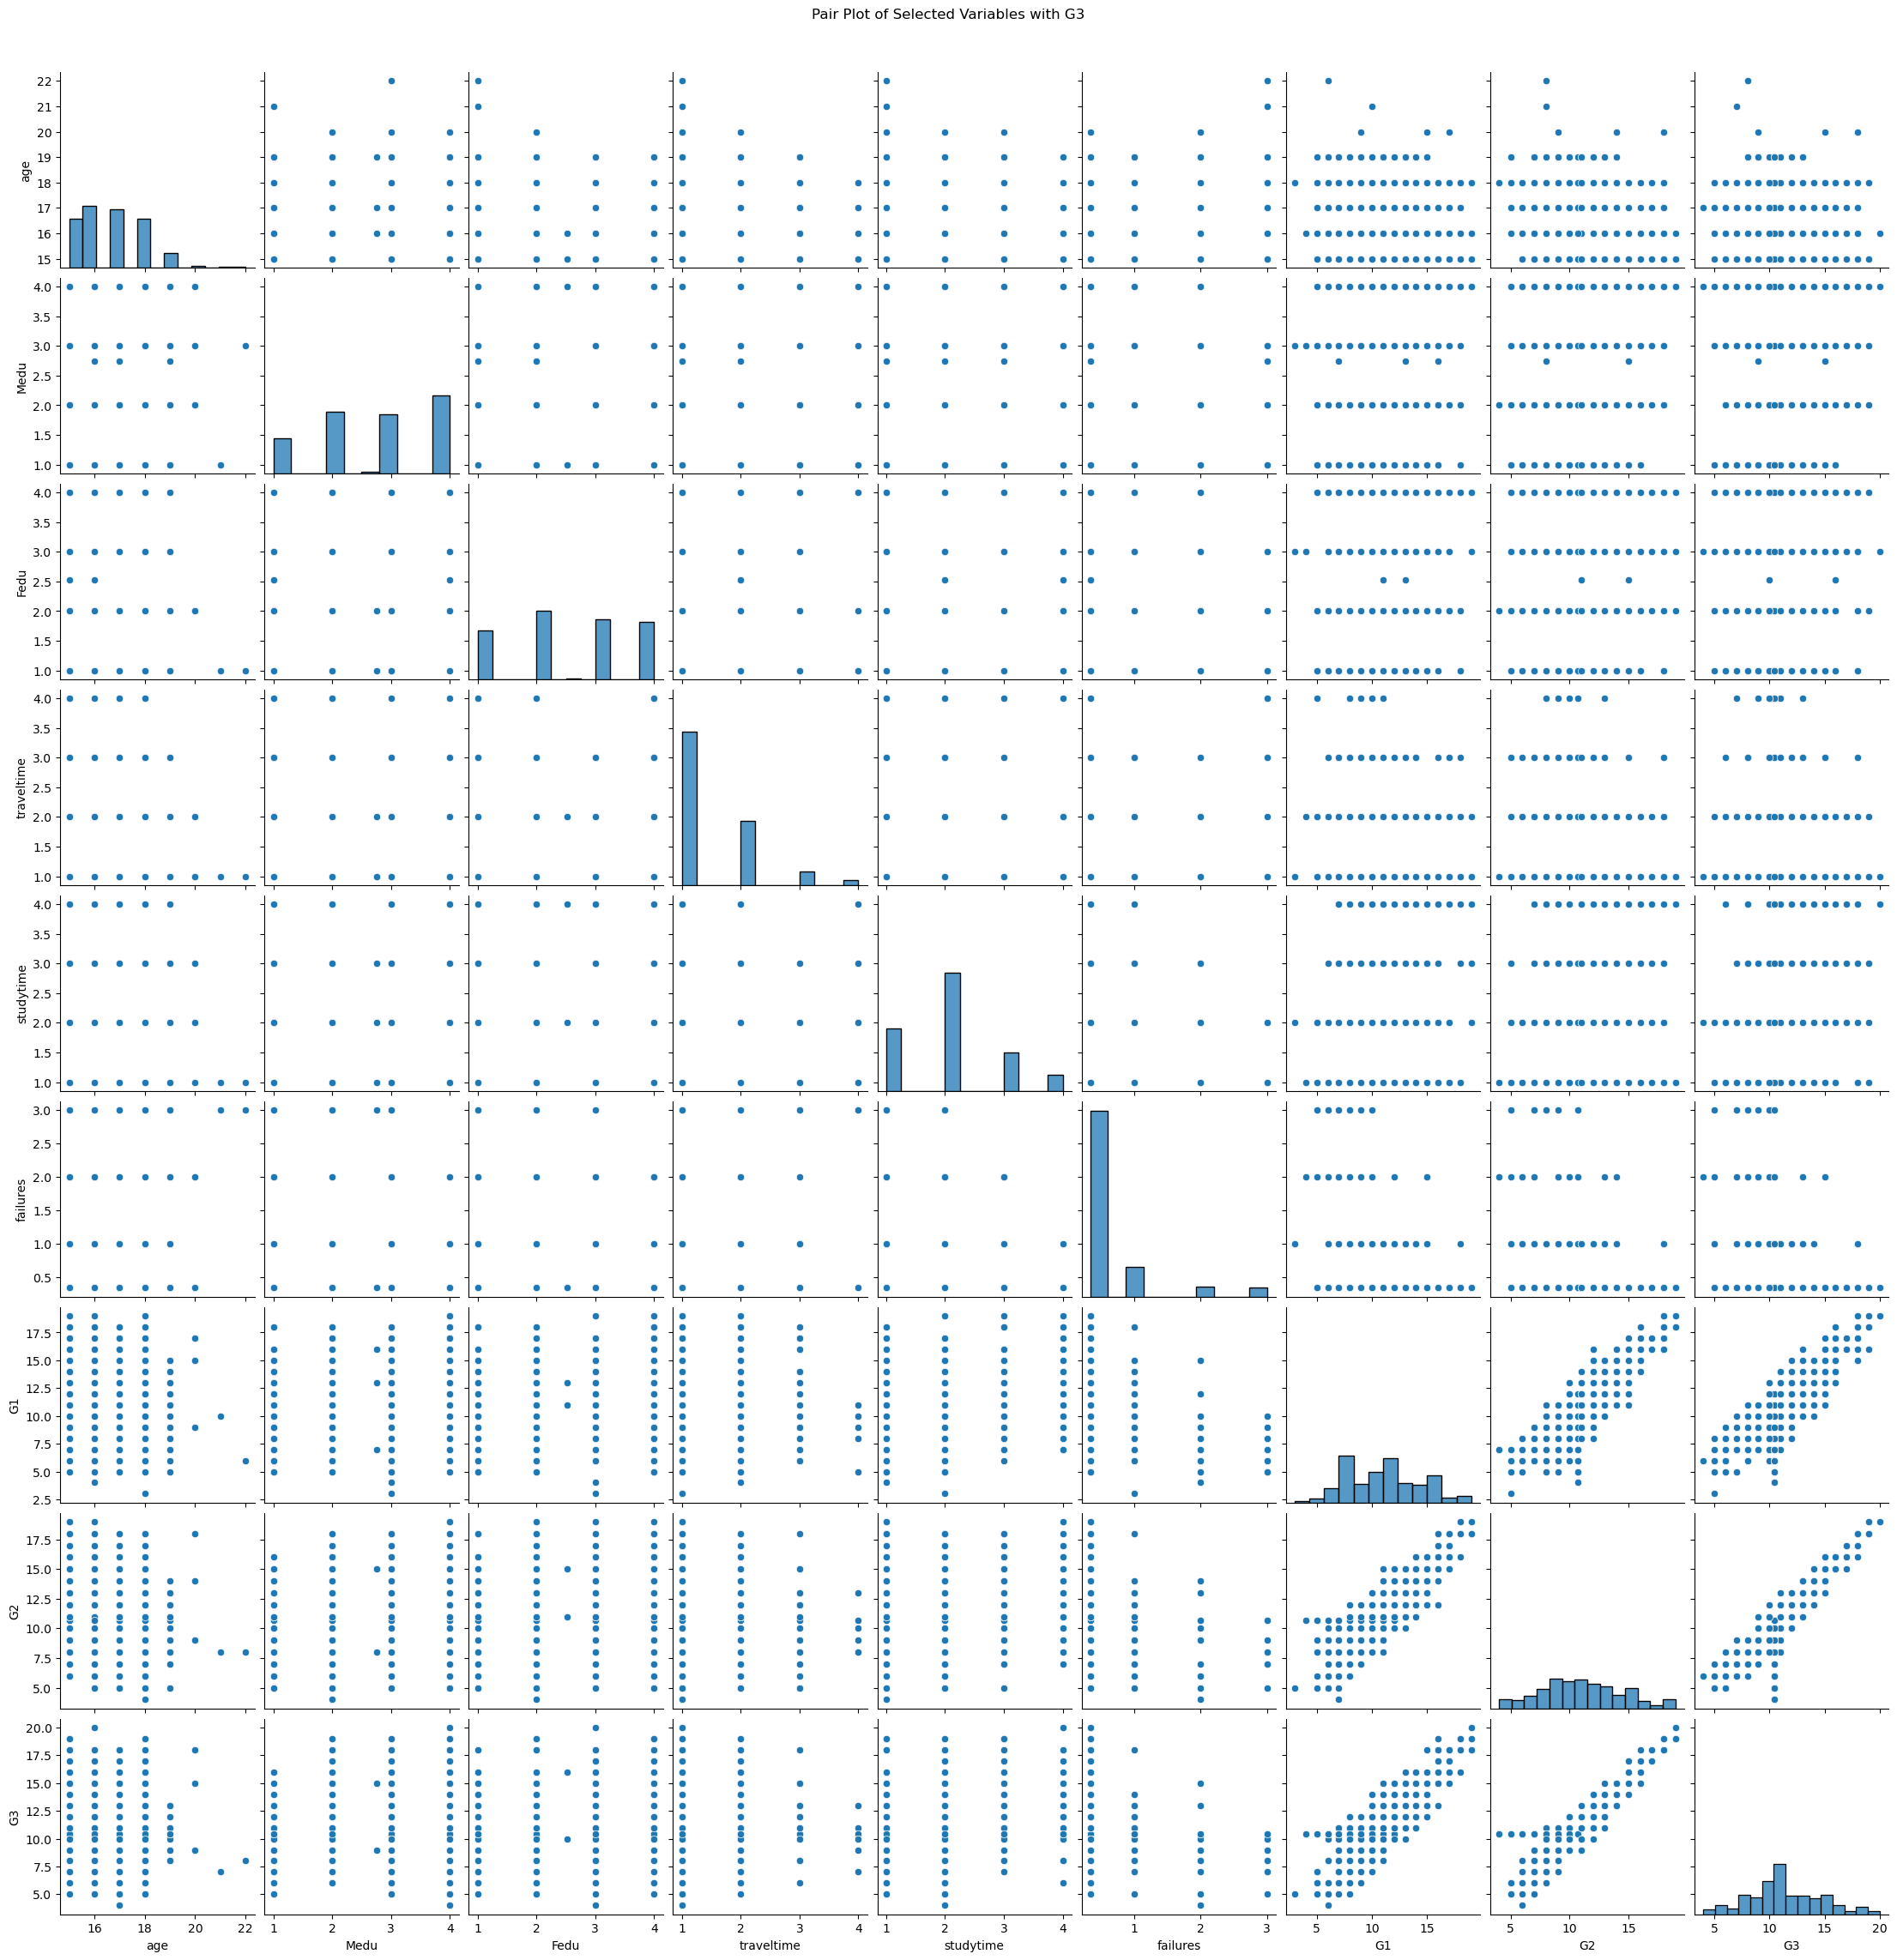

In [736]:
# Creating a DataFrame with only relevant variables
relevant_df = prabinAnuj[relevant_variables]

# Plotting the pair plot
plt.figure(figsize=(15, 10))
sns.pairplot(relevant_df)
plt.suptitle('Pair Plot of Selected Variables with G3', y=1.02)
plt.show()

# Reasons for again creating scatter plots of G1, G2, and G3: While visualizing all these above relevant variables in the pair plot, it was noticed that besides these key variables (G1, G2, and G3), other numeric variables were interpreted as categorical. This suggests that these variables might have discrete or limited numeric values, making them more suitable for categorical analysis rather than continuous numeric analysis.

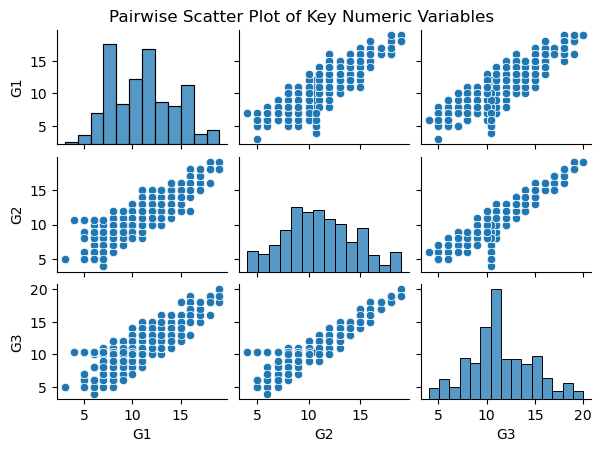

In [737]:
# Reasons for again creating scatter plots of G1, G2, and G3: While visualizing all these above relevant variables in the pair plot, it was noticed that besides these key variables (G1, G2, and G3), other numeric variables were interpreted as categorical. This suggests that these variables might have discrete or limited numeric values, making them more suitable for categorical analysis rather than continuous numeric analysis.
# Scatter plot of specific numeric variables 
specific_numeric_columns = ['G1', 'G2', 'G3']
specific_scatter_data = new_df[specific_numeric_columns]
sns.pairplot(specific_scatter_data, height=1.45, aspect=1.4)
plt.suptitle("Pairwise Scatter Plot of Key Numeric Variables", y=1.02)
plt.show()

# Plotting pie charts for relevant variables except G1, G2, and G3

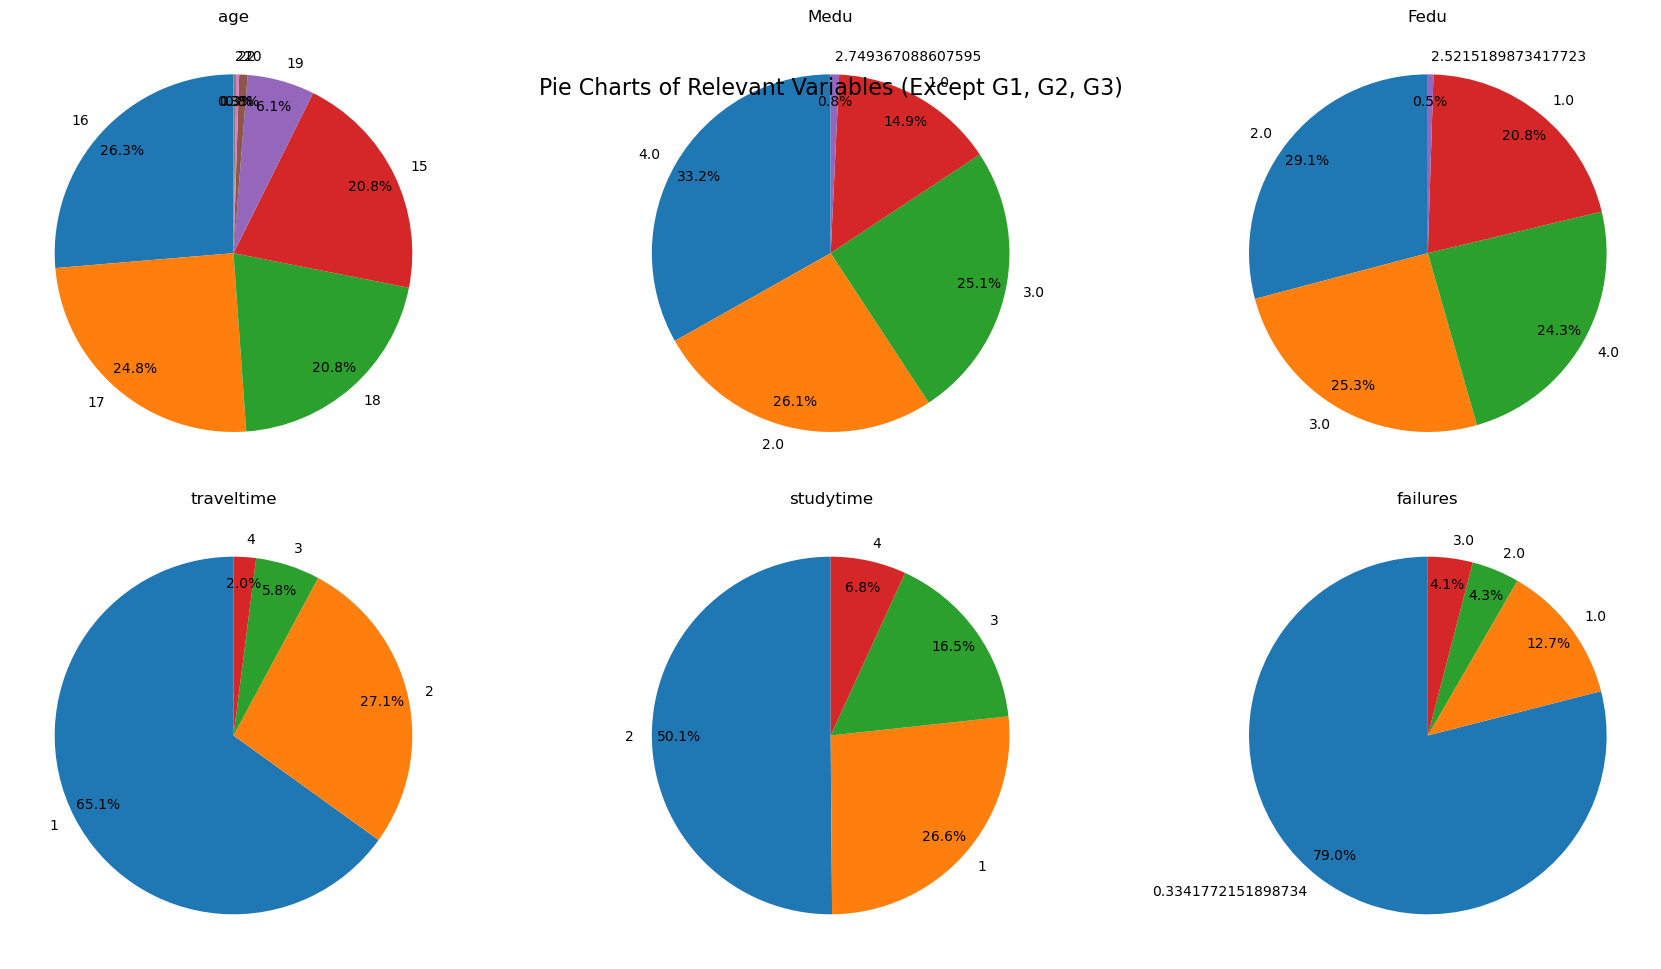

In [738]:
# List of relevant variables except G1, G2, and G3
relevant_variables_except_G1_G2_G3 = ['age', 'Medu', 'Fedu', 'traveltime','studytime', 'failures']

# Plotting pie charts for relevant variables
plt.figure(figsize=(18, 15))
for i, variable in enumerate(relevant_variables_except_G1_G2_G3, 1):
    plt.subplot(3, 3, i)
    plt.title(variable)
    prabinAnuj[variable].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, pctdistance=0.85)
    plt.ylabel('')  # Remove y-label for clarity
plt.suptitle('Pie Charts of Relevant Variables (Except G1, G2, G3)', y=0.92, fontsize=16)
plt.tight_layout()
plt.show()

# Plotting histograms for relevant numeric variables which are selected from correlation matrix by looking the correlation value with G3

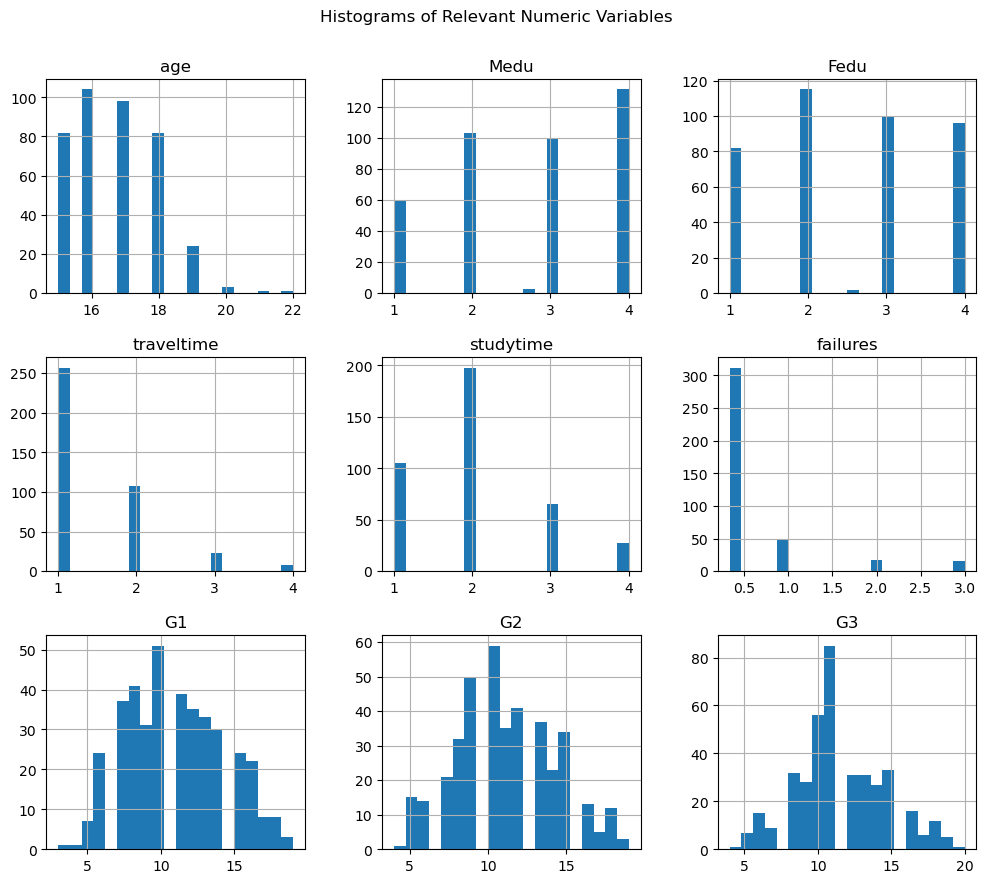

In [739]:
# Plotting histograms for relevant numeric variables which are selected from correlation matrix by looking the correlation value with G3
relevant_df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Relevant Numeric Variables', y=0.95)
plt.show()

In [740]:
X = new_df.drop('G3', axis=1).values
y = new_df['G3'].values

In [741]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((276, 57), (276,), (119, 57), (119,))

In [742]:
X_test

array([[17, 2.0, 1.0, ..., True, True, False],
       [18, 1.0, 2.0, ..., True, False, True],
       [18, 3.0, 3.0, ..., True, False, True],
       ...,
       [18, 3.0, 2.0, ..., True, True, False],
       [17, 2.0, 3.0, ..., False, True, False],
       [16, 4.0, 4.0, ..., True, False, True]], dtype=object)

In [743]:
# Scaling the data using pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
X_test

array([[ 0.21668659, -0.72793423, -1.44206653, ...,  0.42959208,
         0.72447352, -0.72447352],
       [ 0.99338138, -1.68693691, -0.49334198, ...,  0.42959208,
        -1.3803127 ,  1.3803127 ],
       [ 0.99338138,  0.23106845,  0.45538256, ...,  0.42959208,
        -1.3803127 ,  1.3803127 ],
       ...,
       [ 0.99338138,  0.23106845, -0.49334198, ...,  0.42959208,
         0.72447352, -0.72447352],
       [ 0.21668659, -0.72793423,  0.45538256, ..., -2.32778965,
         0.72447352, -0.72447352],
       [-0.5600082 ,  1.19007113,  1.4041071 , ...,  0.42959208,
        -1.3803127 ,  1.3803127 ]])

In [744]:
# initializing the algorithm
lin_reg = LinearRegression()

# Fitting Simple Linear Regression to the Training set
lin_reg.fit(X_train,y_train)

LinearRegression()

In [745]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [746]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.9038770921267419
MSE: 1.4375856484849894
RMSE: 1.1989935981834887
R2 Square 0.8828201604210983
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.8003848999885114
MSE: 1.0918414166120987
RMSE: 1.0449121573663973
R2 Square 0.8679978028672243
__________________________________


In [747]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.903877,1.437586,1.198994,0.88282,0.822918


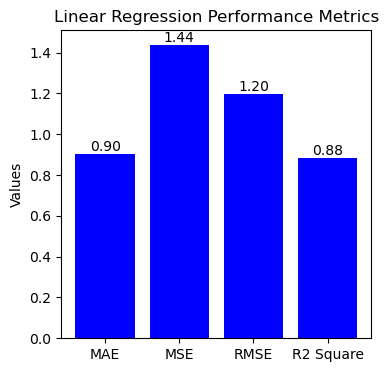

In [748]:
# Individual performance metrics for Linear Regression
metrics_lin = evaluate(y_test, test_pred)
metrics_names = ['MAE', 'MSE', 'RMSE', 'R2 Square']

plt.figure(figsize=(4, 4))
bars = plt.bar(metrics_names, metrics_lin, color='b')
plt.title('Linear Regression Performance Metrics')
plt.ylabel('Values')

# Adding text on top of bars
for bar, value in zip(bars, metrics_lin):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

plt.show()


In [749]:
model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

Lasso(alpha=0.1, positive=True, precompute=True, random_state=42,
      selection='random')

In [750]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.8613128185353153
MSE: 1.2223903195228385
RMSE: 1.1056176190360023
R2 Square 0.9003610660029594
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.8345060444150544
MSE: 1.2873437768924776
RMSE: 1.1346117295764564
R2 Square 0.8443618235857917
__________________________________


In [751]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.merge(results_df , results_df_2 , how='outer')
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.903877,1.437586,1.198994,0.882820,0.822918
1,Lasso Regression,0.861313,1.222390,1.105618,0.900361,0.827901


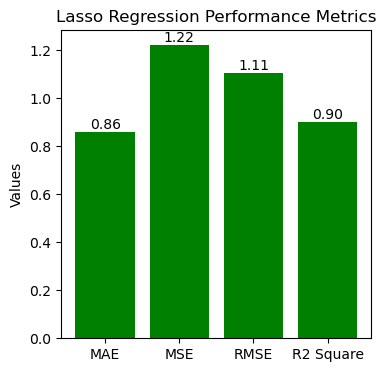

In [752]:
# Evaluate the Lasso Regression model
metrics_lasso = evaluate(y_test, test_pred)

# Plot the Lasso Regression performance metrics
plt.figure(figsize=(4, 4))
bars = plt.bar(metrics_names, metrics_lasso, color='g')
plt.title('Lasso Regression Performance Metrics')
plt.ylabel('Values')

# Adding text on top of bars
for bar, value in zip(bars, metrics_lasso):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

plt.show()

In [753]:
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN Model
def build_ann():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

ann_model = build_ann()
ann_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Predictions
train_pred = ann_model.predict(X_train)
test_pred = ann_model.predict(X_test)

c:\Users\acer\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 117.9785
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55.4501 
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.6114 
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.1850 
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9873 
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0761 
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7185 
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3704 
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3790 
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2527 
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0922 
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8482 
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8128 
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7702 
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6194 
E

In [754]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.2371656882155515
MSE: 2.470787884570883
RMSE: 1.5718740040381363
R2 Square 0.7986022410194275
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.08091798241128399
MSE: 0.01425809210205283
RMSE: 0.11940725313837862
R2 Square 0.9982762153406559
__________________________________


In [755]:
results_df_3 = pd.DataFrame(data=[["ANN Regression", *evaluate(y_test, test_pred), None]],  # Cross-validation for ANN is omitted for simplicity
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_3])
results_df

C:\Users\acer\AppData\Local\Temp\ipykernel_3388\1050891811.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, results_df_3])


,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.903877,1.437586,1.198994,0.882820,0.822918
1,Lasso Regression,0.861313,1.222390,1.105618,0.900361,0.827901
0,ANN Regression,1.237166,2.470788,1.571874,0.798602,NaN


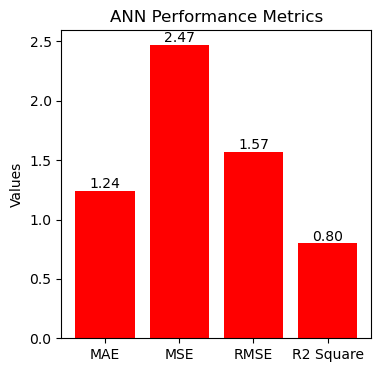

In [756]:
# Evaluate the ANN model
metrics_ann = evaluate(y_test, test_pred)

# Plot the ANN performance metrics
plt.figure(figsize=(4, 4))
bars = plt.bar(metrics_names, metrics_ann, color='r')
plt.title('ANN Performance Metrics')
plt.ylabel('Values')

# Adding text on top of bars
for bar, value in zip(bars, metrics_ann):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

plt.show()

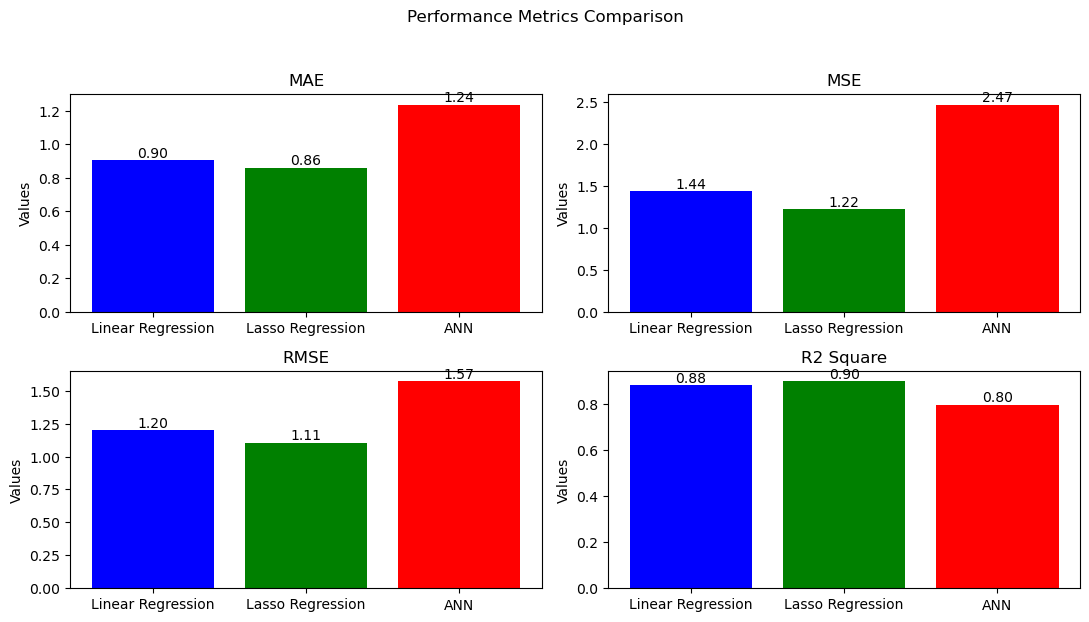

In [757]:
# Create a DataFrame to hold the metrics for all models
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'ANN'],
    'MAE': [metrics_lin[0], metrics_lasso[0], metrics_ann[0]],
    'MSE': [metrics_lin[1], metrics_lasso[1], metrics_ann[1]],
    'RMSE': [metrics_lin[2], metrics_lasso[2], metrics_ann[2]],
    'R2 Square': [metrics_lin[3], metrics_lasso[3], metrics_ann[3]],
    'Cross Validation': [cross_val(LinearRegression()), cross_val(LinearRegression()), None]  # Assuming cross_val for ANN is not calculated
})
# Plot the performance metrics for all models
metrics_names = ['MAE', 'MSE', 'RMSE', 'R2 Square']

fig, ax = plt.subplots(2, 2, figsize=(11, 6.5))
fig.suptitle('Performance Metrics Comparison')

colors = ['b', 'g', 'r']
models = results_df['Model']

for i, metric in enumerate(metrics_names):
    ax[i//2, i%2].bar(models, results_df[metric], color=colors)
    ax[i//2, i%2].set_title(metric)
    ax[i//2, i%2].set_ylabel('Values')
    
    for bar, value in zip(ax[i//2, i%2].patches, results_df[metric]):
        ax[i//2, i%2].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Grade Predictor Model

In [758]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Load your data
data = pd.read_csv("student_data.csv")

# Separate features and target variable
X = data.drop(columns=['G3'])
y = data['G3']

# Define preprocessing for numeric and categorical features
numeric_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a preprocessing and training pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(model, 'grade_predictor_model.joblib')


['grade_predictor_model.joblib']